In this notebook, we'll walk through the basics of preparing your data for use with SDV. This includes loading your dataset and creating a metadata description for your tables. You can download the files used in this tutorial from the following link:
https://drive.google.com/drive/folders/1WRcrmDT_S9xq9CpqzD7WxSpWbLkwadAe?usp=sharing

# 1. Installing the dependencies
We will first install the ***sdv*** library.

In [ ]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.8/73.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8

# 2. Loading the CSV file
Upload the CSV file for which you want to generate synthetic data. In this tutorial, we’ll use a sample sales dataset, but feel free to upload your own file instead.

## 2.1 Upload your CSV file

In [ ]:
from google.colab import files

uploaded = files.upload()

## 2.2 Loading the data in Python

In [ ]:
from sdv.io.local import CSVHandler

connector = CSVHandler()
FOLDER_NAME = '/content/'

data = connector.read(folder_name=FOLDER_NAME)

## 2.3 Inspecting the data

In [ ]:
data.keys()

dict_keys(['data'])

In [ ]:
salesDf = data['data']
salesDf.head()

,Transaction ID,Date,Country,Manufacturer,Product,Unit,Sales,Channel
0,T000001,01-01-2024,USA,Aether Industries,Rainbow Unicorn,30.453271,3689.97,Wholesale
1,T000002,01-01-2024,USA,Aether Industries,Aetheron Mountain Bike,103.302272,15285.84,Wholesale
2,T000003,01-01-2024,USA,Aether Industries,Lux Cruiser,59.115173,18424.82,Direct Sales
3,T000004,01-01-2024,USA,Aether Industries,Outdoor Speaker,71.057632,13146.93,Wholesale
4,T000005,01-01-2024,USA,Radiant Innovations,Gaming Headset,288.055057,20054.01,Direct Sales


# 3. Loading the Metadata file
We will now upload the metadata file for the CSV file we uploaded.

## 3.1 Upload your metadata.json file

In [ ]:
from google.colab import files

uploaded = files.upload()

## 3.2 Loading the metadata into Python

In [ ]:
from sdv.metadata import Metadata
metadata = Metadata.load_from_json('metadata.json')

## 3.3 (Optional) Creating the metadata using SDV
Alternatively, we can use the SDV library to automatically infer the metadata. However, the results may not always be accurate or complete, so you might need to review and update it if there are any discrepancies.

In [ ]:
from sdv.metadata import Metadata

metadata = Metadata.detect_from_dataframes(data)

Auto detected data:



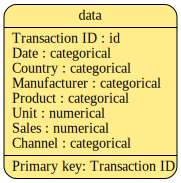

In [ ]:
print('Auto detected data:\n')
metadata.visualize()

## 3.4 Validating the metadata
Let's validate that the metadata format makes sense. If successful, the code below should run without any errors.

In [ ]:
metadata.validate()

# 4. Creating Synthetic Data
With these preparatory steps complete, we can now use the metadata and original dataset with SDV. The code below trains a model and generates synthetic data.

In [ ]:
from sdv.single_table import GaussianCopulaSynthesizer

synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(data=salesDf)

You can specify the number of rows you want the synthesizer to generate using the *num_rows* argument


In [ ]:
synthetic_data = synthesizer.sample(num_rows=10000)

## 4.1 Evaluating the synthetic data

In [ ]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    salesDf,
    synthetic_data,
    metadata)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 8/8 [00:00<00:00, 49.86it/s]|
Column Shapes Score: 97.67%

(2/2) Evaluating Column Pair Trends: |██████████| 28/28 [00:00<00:00, 76.39it/s]|
Column Pair Trends Score: 89.68%

Overall Score (Average): 93.67%



## 4.2 Visualizing the synthetic vs. real data distribution

In [ ]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=salesDf,
    synthetic_data=synthetic_data,
    column_name='Sales',
    metadata=metadata
)

fig.show()

## 4.3 Using Matplotlib to see the Average Monthly Sales for Real & Synthetic Data

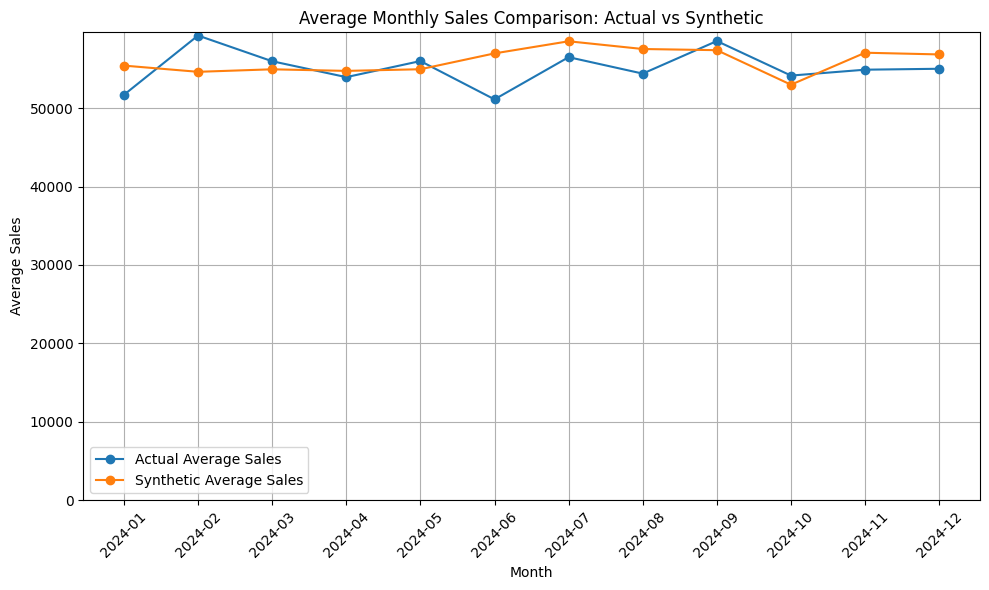

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Date' columns are datetime
salesDf['Date'] = pd.to_datetime(salesDf['Date'], format='%d-%m-%Y')
synthetic_data['Date'] = pd.to_datetime(synthetic_data['Date'], format='%d-%m-%Y')

# Extract 'Month' as year-month string
salesDf['Month'] = salesDf['Date'].dt.to_period('M').astype(str)
synthetic_data['Month'] = synthetic_data['Date'].dt.to_period('M').astype(str)

# Group by 'Month' and calculate average sales
actual_avg_monthly = salesDf.groupby('Month')['Sales'].mean().rename('Actual Average Sales')
synthetic_avg_monthly = synthetic_data.groupby('Month')['Sales'].mean().rename('Synthetic Average Sales')

# Merge the two series into a DataFrame
avg_monthly_comparison = pd.concat([actual_avg_monthly, synthetic_avg_monthly], axis=1).fillna(0)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(avg_monthly_comparison.index, avg_monthly_comparison['Actual Average Sales'], label='Actual Average Sales', marker='o')
plt.plot(avg_monthly_comparison.index, avg_monthly_comparison['Synthetic Average Sales'], label='Synthetic Average Sales', marker='o')

plt.title('Average Monthly Sales Comparison: Actual vs Synthetic')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.ylim(bottom=0)  # y-axis starts at 0
plt.tight_layout()
plt.show()